# 1)- Importing key modules

In [1]:
# support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re    # for regular expressions 
import nltk  # for text manipulation 
#For other text data
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')

import string 
import numpy as np 
import pickle
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#https://textblob.readthedocs.io/en/dev/install.html
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [4]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [5]:
# for dynamic visuals
import plotly as py
import cufflinks as cf

In [6]:
# for offline mode in notebook
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [7]:
%reload_ext version_information
%version_information pandas,numpy, nltk, seaborn, matplotlib

Software versions
Python 3.7.7 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.13.0
OS Windows 10 10.0.17763 SP0
pandas 1.0.3
numpy 1.18.1
nltk 3.5
seaborn 0.10.1
matplotlib 3.1.3
Thu Jun 18 11:23:23 2020 W. Europe Daylight Time

# 2)- Loading Dataset

In [8]:
data=pd.read_csv('Womens Clothing E-Commerce Reviews.csv',index_col=[0])
data.shape

(23486, 10)

In [9]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [10]:
data=data.drop(['Clothing ID','Title'], axis=1)

In [11]:
data.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### 2.1)-Types of features in our dataset

In [12]:
data.dtypes.value_counts()

object    4
int64     4
dtype: int64

In [13]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(data)
table_dtype

,Data Type
Age,int64
Rating,int64
Recommended IND,int64
Positive Feedback Count,int64
Review Text,object
Division Name,object
Department Name,object
Class Name,object


### 2.2. Missing values check

In [14]:
data.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

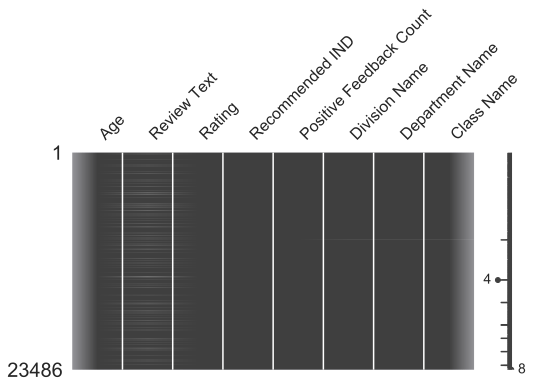

In [15]:
import missingno
missingno.matrix(data, figsize = (8,4))

In [16]:
# Checking rows now
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

In [17]:
summary_missing(data)

No. of fields:  23486
No. of missing fields:  4


,No. of mising Value,%age of missing Value
Review Text,845,3.6
Division Name,14,0.1
Department Name,14,0.1
Class Name,14,0.1


**check where those missing values occur for "Class Name" feature only**

In [18]:
class_name=data['Class Name']

In [19]:
class_name.loc[class_name.isnull()]

9444     NaN
13767    NaN
13768    NaN
13787    NaN
16216    NaN
16221    NaN
16223    NaN
18626    NaN
18671    NaN
20088    NaN
21532    NaN
22997    NaN
23006    NaN
23011    NaN
Name: Class Name, dtype: object

We know where those 14 missing values are and at exact what index

**How about "Department Name"**

In [20]:
dept_name=data['Department Name']

In [21]:
dept_name.loc[dept_name.isnull()]

9444     NaN
13767    NaN
13768    NaN
13787    NaN
16216    NaN
16221    NaN
16223    NaN
18626    NaN
18671    NaN
20088    NaN
21532    NaN
22997    NaN
23006    NaN
23011    NaN
Name: Department Name, dtype: object

These missing values occur exact at same point. We can check each feature one by one or we can save time and see all points

**checking missing value points for all dataset**

In [22]:
col_mask=data.isnull().any(axis=0)

In [23]:
row_mask=data.isnull().any(axis=1)

In [24]:
data.loc[row_mask,col_mask]

,Review Text,Division Name,Department Name,Class Name
92,NaN,General Petite,Tops,Knits
93,NaN,General,Dresses,Dresses
98,NaN,General,Jackets,Outerwear
135,NaN,General Petite,Tops,Knits
142,NaN,General,Jackets,Outerwear
...,...,...,...,...
23258,NaN,General,Tops,Knits
23301,NaN,General,Tops,Knits
23303,NaN,General,Tops,Blouses
23470,NaN,General Petite,Dresses,Dresses


These are rows that are supposed to have missing values

In [25]:
# we check from difference ranges of occurances
data.loc[row_mask,col_mask][50:60]

,Review Text,Division Name,Department Name,Class Name
1425,NaN,General Petite,Dresses,Dresses
1454,NaN,Initmates,Intimate,Intimates
1471,NaN,General Petite,Bottoms,Skirts
1485,NaN,General Petite,Dresses,Dresses
1534,NaN,General,Tops,Sweaters
1562,NaN,General,Dresses,Dresses
1573,NaN,General,Dresses,Dresses
1582,NaN,General,Dresses,Dresses
1611,NaN,General Petite,Bottoms,Skirts
1643,NaN,General,Tops,Knits


### 2.3.Fixing missing values

**Instead of dropping , we shall fill these null values with 'other'**

In [26]:
data=data.fillna('other')

In [27]:
summary_missing(data)

No. of fields:  23486
No. of missing fields:  0


,No. of mising Value,%age of missing Value


# 3)- Exporing Features

### 3.1)- Review Text

In [28]:
data['Review Text'].head(2)

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
Name: Review Text, dtype: object

In [29]:
#converting to list
review_list=data['Review Text'].tolist()
type(review_list)

list

In [30]:
review_list[0]

'Absolutely wonderful - silky and sexy and comfortable'

In [31]:
review_str=' '.join(data['Review Text'].tolist())
type(review_str)

str

In [32]:
review_str[:100]

"Absolutely wonderful - silky and sexy and comfortable Love this dress!  it's sooo pretty.  i happene"

Here each word is acting as string. Classical coders like to convert dataframe --> Series --> list -->str 
Advantage is that in the end text is taken as string and we get clear idea how later stages make sense such as cleaning data and tokenization

### 3.2)- Expansion for contracted words


for text cleaning part

In [33]:
contractions = { 
"ain't": "am not ",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
    
}

In [34]:
def expand(x):
    if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value=contractions[key]
            x=x.replace(key, value)
        return x
    else: 
        return x

In [35]:
sample_text = "I don't like coffee as it makes me thirsty\""

In [36]:
print(expand(sample_text))

I do not like coffee as it makes me thirsty"


In [37]:
# apply to text in data
%time
data['Review Text']= data['Review Text'].apply(lambda x: expand(x))

Wall time: 0 ns


In [38]:
print(' '.join(data['Review Text'].tolist())[:1000])

Absolutely wonderful - silky and sexy and comfortable Love this dress!  it is sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it is petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt is

# 4)- Feature Engineering

### 4.1. creating polarity feature


for reviews

In [39]:
data['polarity'] = data['Review Text']. apply(lambda x: TextBlob(x).sentiment.polarity)

In [40]:
data.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,polarity
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333
1,34,Love this dress! it is sooo pretty. i happen...,5,1,4,General,Dresses,Dresses,0.339583
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675
3,50,"I love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,0.550000
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891


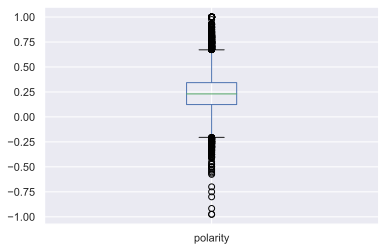

In [41]:
data.polarity.plot(kind='box')

Value at 0 = Neutral
value < Negative
value > Positive


- We can see that general sentiments of these reviews have median value at 0.25 meaning that overall reviews are positive
- The lower threshold point is around -0.25. Anything below is outlier case for even negative sentiments. Some are very low even at minus 0.75 and minus 1 and are outliers of higher proportions or extreme case.
- The threshold for positive sentiment is 0.70.Anything above is outliers. There are few cases but they are not like negative.
- Finally mean value is 0.25 and it has an above and lower margin somewhat between as higher as 0.30 and as low as 0.20. Hence, it shows that for a general review ......even lower mean value of sentiment is 0.20 which is positive sentiment

### 4.2. review length

In [42]:
data['review_len']=data['Review Text'].apply(lambda x: len(x))

In [ ]:
data['word_count']= data['Review Text'].apply(lambda x: len(x.split()))